# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#print(cities)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval     ")
print("-----------------------------")
set_count = 1
record_count=1
city_data=[]
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    if (i>=50):
        set_count=set_count+1
        record_count=0
    query_url = url + "appid=" + api_key + "&q=" + city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | mokshan
Processing Record 3 of Set 1 | kalabo
Processing Record 4 of Set 1 | hervey bay
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | maputo
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | linares
Processing Record 10 of Set 1 | vestmannaeyjar
Processing Record 11 of Set 1 | charters towers
Processing Record 12 of Set 1 | hobyo
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | banda aceh
Processing Record 16 of Set 1 | srivardhan
Processing Record 17 of Set 1 | kununurra
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | tautira
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | tawn

Processing Record 0 of Set 135 | a coruna
Processing Record 0 of Set 136 | port elizabeth
Processing Record 0 of Set 137 | hoa binh
Processing Record 0 of Set 138 | sioux lookout
Processing Record 0 of Set 139 | la trinidad
Processing Record 0 of Set 140 | ambon
Processing Record 0 of Set 141 | kieta
Processing Record 0 of Set 142 | tumannyy
City not found. Skipping...
Processing Record 0 of Set 143 | praia
Processing Record 0 of Set 144 | manakara
Processing Record 0 of Set 145 | kozienice
Processing Record 0 of Set 146 | turukhansk
Processing Record 0 of Set 147 | balimo
City not found. Skipping...
Processing Record 0 of Set 148 | sigayevo
Processing Record 0 of Set 149 | puerto del rosario
Processing Record 0 of Set 150 | muriwai beach
Processing Record 0 of Set 151 | khatanga
Processing Record 0 of Set 152 | mehamn
Processing Record 0 of Set 153 | barrow
Processing Record 0 of Set 154 | zhanakorgan
Processing Record 0 of Set 155 | manuk mangkaw
Processing Record 0 of Set 156 | buss

Processing Record 0 of Set 316 | pucallpa
Processing Record 0 of Set 317 | mandalgovi
Processing Record 0 of Set 318 | majene
Processing Record 0 of Set 319 | terrasini
Processing Record 0 of Set 320 | tilichiki
Processing Record 0 of Set 321 | fantanele
Processing Record 0 of Set 322 | broken hill
Processing Record 0 of Set 323 | tabiauea
City not found. Skipping...
Processing Record 0 of Set 324 | singaraja
Processing Record 0 of Set 325 | mugur-aksy
Processing Record 0 of Set 326 | gorontalo
Processing Record 0 of Set 327 | mingaora
Processing Record 0 of Set 328 | meyungs
City not found. Skipping...
Processing Record 0 of Set 329 | parsons
Processing Record 0 of Set 330 | dromolaxia
Processing Record 0 of Set 331 | aykhal
Processing Record 0 of Set 332 | amderma
City not found. Skipping...
Processing Record 0 of Set 333 | mahebourg
Processing Record 0 of Set 334 | kamenskoye
City not found. Skipping...
Processing Record 0 of Set 335 | saleaula
City not found. Skipping...
Processing

Processing Record 0 of Set 496 | masvingo
Processing Record 0 of Set 497 | itarema
Processing Record 0 of Set 498 | paidha
Processing Record 0 of Set 499 | lagoa
Processing Record 0 of Set 500 | atambua
Processing Record 0 of Set 501 | yulara
Processing Record 0 of Set 502 | balkanabat
Processing Record 0 of Set 503 | eseka
Processing Record 0 of Set 504 | dakar
Processing Record 0 of Set 505 | marinette
Processing Record 0 of Set 506 | vostok
Processing Record 0 of Set 507 | dzaoudzi
Processing Record 0 of Set 508 | salalah
Processing Record 0 of Set 509 | kalyny
Processing Record 0 of Set 510 | ostrovnoy
Processing Record 0 of Set 511 | yazoo city
Processing Record 0 of Set 512 | erenhot
Processing Record 0 of Set 513 | nemuro
Processing Record 0 of Set 514 | sechura
Processing Record 0 of Set 515 | abu zabad
Processing Record 0 of Set 516 | walvis bay
Processing Record 0 of Set 517 | irpa irpa
Processing Record 0 of Set 518 | alexandria
Processing Record 0 of Set 519 | codrington
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
city_data_df=pd.DataFrame(city_data)
city_data_df.head()
lat=city_data_df["Lat"]
max_temp=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
wind_speed=city_data_df["Wind Speed"]
cloudiness=city_data_df["Cloudiness"]
city_data_df.to_csv("output_data/file.csv")
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kaitangata,54,NZ,1569565545,62,-46.28,169.85,284.820,4.92
1,mokshan,97,RU,1569565720,69,53.44,44.61,280.930,2.63
2,kalabo,0,ZM,1569565721,37,-15.00,22.67,291.292,5.93
3,hervey bay,4,AU,1569565156,50,-25.30,152.85,298.150,6.20
4,albany,1,US,1569565513,87,42.65,-73.75,284.820,2.38


#### Latitude vs. Temperature Plot

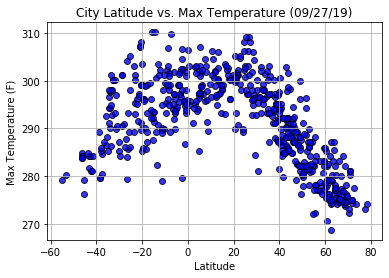

In [34]:
plt.scatter(lat,max_temp,marker='o',color='b',alpha=0.80,edgecolor='black')
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("output_data/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

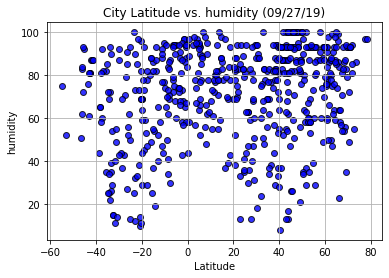

In [35]:
plt.scatter(lat,humidity,marker='o',color='b',alpha=0.80,edgecolor='black')
plt.grid(True)
plt.title("City Latitude vs. humidity (%s)" % time.strftime("%x"))
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.savefig("output_data/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

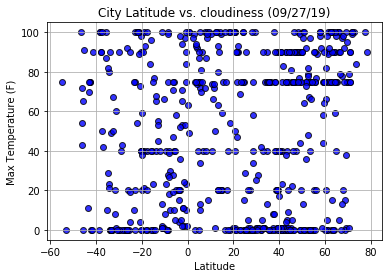

In [33]:
plt.scatter(lat,cloudiness,marker='o',color='b',alpha=0.80,edgecolor='black')
plt.grid(True)
plt.title("City Latitude vs. cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("output_data/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

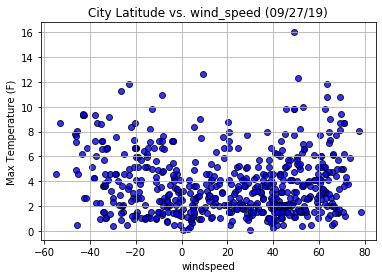

In [32]:
plt.scatter(lat,wind_speed,marker='o',color='b',alpha=0.80,edgecolor='black')
plt.grid(True)
plt.title("City Latitude vs. wind_speed (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("windspeed")
plt.savefig("output_data/fig4.png")
plt.show()